In [1]:
import pandas as pd

data = pd.read_excel("Demand_Sales_Forecast2.xls")

In [2]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,213,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,44256,East,OFF-LA-10004544,Office Supplies,Labels,Avery 505,23.680,2,0.2,8.8800
1,214,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,44256,East,FUR-BO-10004695,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,452.450,5,0.5,-244.3230
2,215,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,44256,East,TEC-PH-10002844,Technology,Phones,Speck Products Candyshell Flip Case,62.982,3,0.4,-14.6958
3,216,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,44256,East,TEC-MA-10000864,Technology,Machines,Cisco 9971 IP Video Phone Charcoal,1188.000,9,0.7,-950.4000
4,217,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,44256,East,TEC-AC-10000109,Technology,Accessories,Sony Micro Vault Click 16 GB USB 2.0 Flash Drive,89.584,2,0.2,4.4792


In [3]:
data = data.dropna()

In [4]:
data['Status'] = [1 if x > 50 else 0 for x in data['Profit']] 

In [5]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Status
0,213,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,East,OFF-LA-10004544,Office Supplies,Labels,Avery 505,23.680,2,0.2,8.8800,0
1,214,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,East,FUR-BO-10004695,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,452.450,5,0.5,-244.3230,0
2,215,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,East,TEC-PH-10002844,Technology,Phones,Speck Products Candyshell Flip Case,62.982,3,0.4,-14.6958,0
3,216,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,East,TEC-MA-10000864,Technology,Machines,Cisco 9971 IP Video Phone Charcoal,1188.000,9,0.7,-950.4000,0
4,217,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,East,TEC-AC-10000109,Technology,Accessories,Sony Micro Vault Click 16 GB USB 2.0 Flash Drive,89.584,2,0.2,4.4792,0


In [6]:
import datetime

data['Order Date'] = pd.to_datetime(data['Order Date'])




In [7]:
data['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [8]:
furniture = data.loc[data['Category'] == 'Furniture']
furniture = furniture.sort_values('Order Date')

In [9]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
               '2015-01-10', '2015-01-13', '2015-01-13', '2015-01-17',
               '2015-01-19', '2015-01-19',
               ...
               '2015-12-25', '2015-12-25', '2015-12-26', '2015-12-26',
               '2015-12-27', '2015-12-27', '2015-12-27', '2015-12-27',
               '2015-12-27', '2015-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=452, freq=None)

In [10]:
y = furniture['Sales'].resample('MS').mean()

In [11]:
y

Order Date
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
Freq: MS, Name: Sales, dtype: float64

In [12]:
import matplotlib.pyplot as plt

y.plot(figsize=(15, 6))
import itertooplt.show()

<Figure size 1500x600 with 1 Axes>

In [16]:
import itertools

p = d = q = range(0, 2)


pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

c:\python3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:162.26402938598986
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:142.0388135503644
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:120.52766197963767
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:100.11764871887979
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:145.15062167493036
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:116.79692241951744
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:112.04591381954808
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:101.90776612338385


In [29]:
mod = sm.tsa.statespace.SARIMAX(y,order=(0, 0, 0),seasonal_order=(0, 1, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2              0          0        nan        nan           0           0


c:\python3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
c:\python3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2199: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)
c:\python3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\python3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\python3\lib\site-packages\scipy\stats\_distn_inf

IndexError: index 0 is out of bounds for axis 0 with size 0

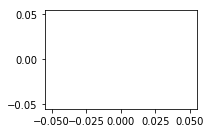

In [26]:
results.plot_diagnostics()
plt.show()

In [13]:
from pylab import rcParams
import statsmodels.api as sm
#rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decmod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])ompose(y, model='additive')
fig = decomposition.plot()
plt.show()

SyntaxError: invalid syntax (<ipython-input-13-36b371472a72>, line 10)

In [25]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 10),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

IndexError: too many indices for array

In [26]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

IndentationError: unexpected unindent (<ipython-input-26-b09dc1f80d40>, line 9)